In [1]:
# Required for compatibility with Python 2
from __future__ import print_function
from builtins import range, object


They allow you to use Python 3 features in Python 2, ensuring consistent behavior and making the transition between Python versions smoother.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
# Create templates directory if it doesn't exist
if not os.path.exists('templates'):
    os.makedirs('templates')


In [4]:
class TwoLayerNet(object):
    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        self.params = {
            'W1': std * np.random.randn(input_size, hidden_size),
            'b1': np.zeros(hidden_size),
            'W2': std * np.random.randn(hidden_size, output_size),
            'b2': np.zeros(output_size)
        }
        
    def loss(self, X, y=None, reg=0.0):
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        
        # Forward pass: compute class scores
        hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
        scores = np.dot(hidden_layer, W2) + b2

        if y is None:
            return scores
        
        # Compute the loss: Softmax loss
        scores_shifted = scores - np.max(scores, axis=1, keepdims=True)
        softmax_matrix = np.exp(scores_shifted) / np.sum(np.exp(scores_shifted), axis=1, keepdims=True)
        correct_class_scores = softmax_matrix[np.arange(N), y]
        loss = -np.sum(np.log(correct_class_scores)) / N
        loss += reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
         
            
            
        # Backward pass: compute gradients
        grads = {}
        softmax_matrix[np.arange(N), y] -= 1
        softmax_matrix /= N
        grads['W2'] = np.dot(hidden_layer.T, softmax_matrix) + 2 * reg * W2
        grads['b2'] = np.sum(softmax_matrix, axis=0)
        hidden_grad = np.dot(softmax_matrix, W2.T)
        hidden_grad[hidden_layer <= 0] = 0
        grads['W1'] = np.dot(X.T, hidden_grad) + 2 * reg * W1
        grads['b1'] = np.sum(hidden_grad, axis=0)

        return loss, grads
    
    def train(self, X, y, X_val, y_val, learning_rate=1e-3, learning_rate_decay=0.95, reg=5e-6, num_iters=100, batch_size=200, verbose=False):
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train // batch_size, 1)

        loss_history, train_acc_history, val_acc_history = [], [], []

        for it in range(num_iters):
            batch_indices = np.random.choice(num_train, batch_size, replace=True)
            X_batch, y_batch = X[batch_indices], y[batch_indices]

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            # Update the parameters using the gradients
            for param in self.params:
                self.params[param] -= learning_rate * grads[param]

            if verbose and it % 100 == 0:
                print(f'iteration {it} / {num_iters}: loss {loss}')

            # Every epoch, check train and val accuracy and decay learning rate
            if it % iterations_per_epoch == 0:
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)
                learning_rate *= learning_rate_decay

        return {
            'loss_history': loss_history,
            'train_acc_history': train_acc_history,
            'val_acc_history': val_acc_history
        }

    def predict(self, X):
        hidden_layer = np.maximum(0, np.dot(X, self.params['W1']) + self.params['b1'])
        scores = np.dot(hidden_layer, self.params['W2']) + self.params['b2']
        return np.argmax(scores, axis=1)

In [5]:
# Initialize the model and toy data
def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size=4, hidden_size=10, output_size=3, std=1e-1)


In [6]:
def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(5, 4)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

In [7]:
# Create the model and data
net = init_toy_model()
X, y = init_toy_data()


In [8]:
# Forward pass: Compute the scores
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('Correct scores:')
correct_scores = np.asarray([
    [-0.81233741, -1.27654624, -0.70335995],
    [-0.17129677, -1.18803311, -0.47310444],
    [-0.51590475, -1.01354314, -0.8504215],
    [-0.15419291, -0.48629638, -0.52901952],
    [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))


Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720926321086e-08


In [9]:
# Compute the loss
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


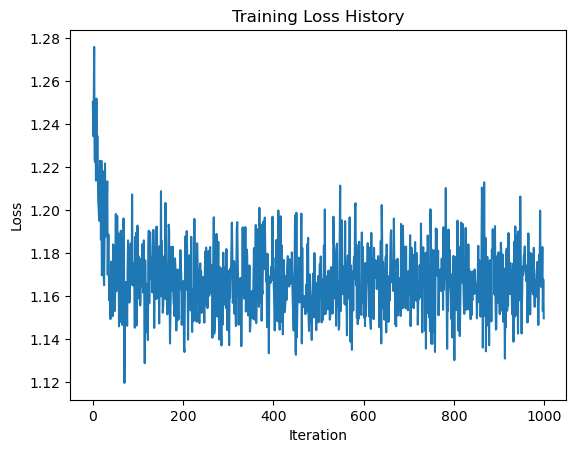

In [10]:
# Plot the loss history
train_results = net.train(X, y, X, y, num_iters=1000, verbose=False)
plt.plot(train_results['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.savefig('templates/Nn_training_loss.png')
plt.show()